In [46]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import json
import pandas as pd
import seaborn as sns

In [47]:
all_play_returns = []
all_test_returns = []

results_root = Path("..")/ "results"

min_num_episodes = 100000000


for subdir in [x for x in results_root.iterdir() if x.is_dir()]:

    # load in parameters
    with open(str(subdir/"params.txt")) as f:
        params = json.load(f)


    agent = params["agent"]
    if agent == "uniform_zpd":
        offset = params["zpd"]["offset"]
        radius = params["zpd"]["radius"]
    else:
        offset = None
        radius = None
    
    if agent != "DDQN":
        mix_ratio = params["zpd"]["mix_ratio"]
    else:
        mix_ratio = None

    seed = params["seed"]

    # load play returns
    play_returns_path = subdir/"play_returns.npy"
    if play_returns_path.exists():
        play_returns = np.load(play_returns_path)
        if len(play_returns) < min_num_episodes:
            min_num_episodes = len(play_returns)
        all_play_returns.append([agent, offset, radius, seed] + list(play_returns))
    
    # load test returns
    test_returns_path = subdir/"test_returns.npy"
    if test_returns_path.exists():
        test_returns = np.array(np.load(test_returns_path))
        test_returns = np.mean(test_returns, axis=1)
        all_test_returns.append([agent, offset, radius, seed] + list(test_returns))



In [48]:
cols = ["agent", "offset", "radius", "seed"] + list(range(100))
all_test_returns = pd.DataFrame(data= all_test_returns, columns = cols )
all_test_returns = all_test_returns.infer_objects()

all_test_returns = all_test_returns.set_index(["agent", "offset", "radius", "seed"])
#all_test_returns = all_test_returns.cumsum(axis=1)
all_test_returns = all_test_returns.reset_index()


for i in range(len(all_play_returns)):
    all_play_returns[i] = all_play_returns[i][:min_num_episodes + 4]

cols = ["agent", "offset", "radius", "seed"] + list(range(min_num_episodes))
all_play_returns= pd.DataFrame(data= all_play_returns, columns = cols )
all_play_returns= all_play_returns.infer_objects()
all_play_returns= all_play_returns.set_index(["agent", "offset", "radius", "seed"])
#all_play_returns= all_play_returns.cumsum(axis=1)
all_play_returns= all_play_returns.reset_index()


In [49]:
all_test_returns_melt = pd.melt(all_test_returns, id_vars= ["agent", "offset", "radius", "seed"]
, var_name = "Step",value_name= "Reward", value_vars=list(range(0, 100)))

all_test_returns_melt['Config'] = all_test_returns_melt["agent"].str.cat(all_test_returns_melt['offset'].astype(str), sep = ": ").str.cat(all_test_returns_melt['radius'].astype(str), sep = ": ")    



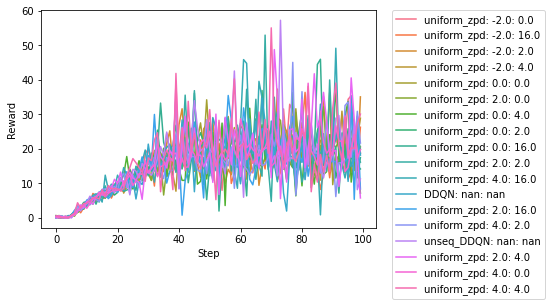

In [50]:


plot = sns.lineplot(x="Step", y= "Reward", hue="Config",ci = None,  data=all_test_returns_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [57]:
plot = sns.lineplot(x="Step", y= "Reward", hue="Config",ci = None,  data=all_test_returns_melt[all_test_returns_melt['agent'] == "unseq_DDQN"])


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-57-421ee4d0d249>, line 1)

In [58]:
all_test_returns_melt[all_test_returns_melt['agent'] == "DDQN"]

,agent,offset,radius,seed,Step,Reward,Config
11,DDQN,NaN,NaN,8479,0,0.0,DDQN: nan: nan
37,DDQN,NaN,NaN,8479,1,0.5,DDQN: nan: nan
63,DDQN,NaN,NaN,8479,2,0.0,DDQN: nan: nan
89,DDQN,NaN,NaN,8479,3,0.4,DDQN: nan: nan
115,DDQN,NaN,NaN,8479,4,0.2,DDQN: nan: nan
...,...,...,...,...,...,...,...
2481,DDQN,NaN,NaN,8479,95,10.6,DDQN: nan: nan
2507,DDQN,NaN,NaN,8479,96,35.4,DDQN: nan: nan
2533,DDQN,NaN,NaN,8479,97,19.3,DDQN: nan: nan
2559,DDQN,NaN,NaN,8479,98,29.5,DDQN: nan: nan


In [52]:
all_play_returns_melt = pd.melt(all_play_returns, id_vars= ["agent", "offset", "radius", "seed"]
, var_name = "Step",value_name= "Reward", value_vars=list(range(0, min_num_episodes)))

all_play_returns_melt['Config'] = all_play_returns_melt["agent"].str.cat(all_play_returns_melt['offset'].astype(str), sep = ": ").str.cat(all_play_returns_melt['radius'].astype(str), sep = ": ")    



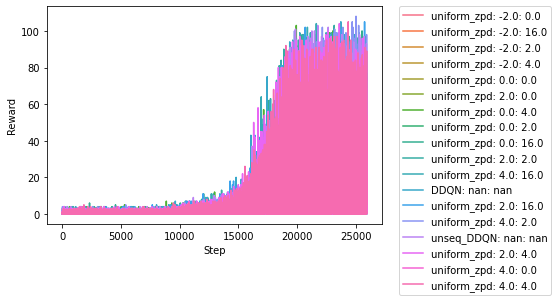

In [53]:
plot = sns.lineplot(x="Step", y= "Reward", hue="Config",ci = None,  data=all_play_returns_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)